In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
expt_type = 'playfight/with_cover_story/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [3]:
df =  pd.read_csv(f'{rootfile_loc}/data_triallevel_sorted.csv',index_col=[0])
df.head()

,subID,stimset_rows,chargeSpeeds,responses,movie,trial_num
6,24093,10,1.5,They are peaceful,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,6
6,24066,59,1.5,Slowly coming together to bump each other.,1a8cf3c1-690b-449c-bb36-fd3b251837c1,6
6,24067,90,1.5,Bumping into each other,e838dadb-c02f-4273-ae93-210720dcd06c,6
5,24068,57,1.5,They are kicking a ball.,31e1789e-459a-4f3d-bfdd-2f4c8c4e9f50,5
4,24069,42,1.5,playing frisbee,8ed7c0fc-1490-4e35-a000-7f7357a0772a,4


In [4]:
df.rename(columns = {'chargeSpeeds':'chargeSpeed'},inplace=True)
df

,subID,stimset_rows,chargeSpeed,responses,movie,trial_num
6,24093,10,1.5,They are peaceful,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,6
6,24066,59,1.5,Slowly coming together to bump each other.,1a8cf3c1-690b-449c-bb36-fd3b251837c1,6
6,24067,90,1.5,Bumping into each other,e838dadb-c02f-4273-ae93-210720dcd06c,6
5,24068,57,1.5,They are kicking a ball.,31e1789e-459a-4f3d-bfdd-2f4c8c4e9f50,5
4,24069,42,1.5,playing frisbee,8ed7c0fc-1490-4e35-a000-7f7357a0772a,4
...,...,...,...,...,...,...
0,24023,57,9.0,There were circling each other and then ran to...,16718611-6bca-4e79-8071-94d68c181ba1,0
6,24022,68,9.0,playing pretend,abb20336-74c4-448b-a5f7-252c765a55f4,6
3,24096,33,9.0,"Running into each other, but it was as if they...",9f7e489f-4076-4332-b57e-13a42d4c75fd,3
2,24097,84,9.0,wrestling,a5228b86-ba0a-42f2-aa38-23b5369f0e56,2


# exploring the data

In [5]:
param_name = 'chargeSpeed'

In [6]:
df.groupby([param_name]).count()

,subID,stimset_rows,responses,movie,trial_num
chargeSpeed,,,,,
1.50,93,93,93,93,93
2.75,102,102,102,102,102
4.00,102,102,102,102,102
5.25,102,102,102,102,102
6.50,102,102,102,102,102
7.75,102,102,102,102,102
9.00,102,102,102,102,102


In [7]:
resp_len = np.array( [len(i) for i in df['responses']])
# resp_len.min(), df['responses'][resp_len == min(resp_len)] # shortest word
resp_len

array([ 18,  42,  23,  24,  15,  23,  68,  20,  17,  38,   8,  33,  37,
         8,  14,  38,   5,  14,  17,   7,   7,  23,   7,  17,  13,  25,
        19,  25,  38,  21,  30,  38,  40,  81,  30,  36,   3,  15,  74,
        52,  27,  28,   7,  20,  27,   7,   7,   3,  24,  20,   7,   9,
        22,  15,  16,  14,  33,  14,   3,  13,   9,  72,  22,  11,  33,
        73,  41,  37,   7,   7,  32,  19,   9,  59,   7,  12,  19,  17,
        31,  72,  21,  34,   4,   7,  11,   7,   7,  27,  14,  48,  14,
        65,  29,   3,   7,  81,   7,  26,  50,   7,   7,  26,  33,  23,
        32,  30,  11,  10,  21, 139,  37,  26,  11,   7,  18,  35,  12,
        33,   3,  37,  53,  21,  11,  47,  64,  22,   7,  22,  50,  11,
         7,   8,  11,   7,  13,   7,  18,  20,   7,  21,  19,   7,   8,
        21,  12,   6,  12,  28,   9,   7,  11,   7,  25,   7,  11,   9,
        16,  85,  31, 109,  21,  11,  16,  11,  23,  40,   9,  24,  30,
        44,   8,   7,  13,  14,   7,  77,  18,   7,  34,  28,  1

In [8]:
resp_len.max(), df['responses'][resp_len == max(resp_len)].values # longest entry

(163,
 array(['The grey dot follows the black dot and then sudden speed up. When it gets close to the black dot, the black then moves toward the grey dot causing them to collide.'],
       dtype=object))

In [9]:
resp_len.mean()

24.99432624113475

In [10]:
resp_len.mean(), df['responses'][resp_len ==25].values # average entry

(24.99432624113475,
 array(['running toward each other', 'moving much slower around',
        'enjoying the surroundings', 'colliding with each other',
        'Attract to collide slowly', 'smashing into one another',
        'running towards eachother', 'playing some sort of game',
        'Same game different speed', 'trying to find each other',
        'colliding into each other'], dtype=object))

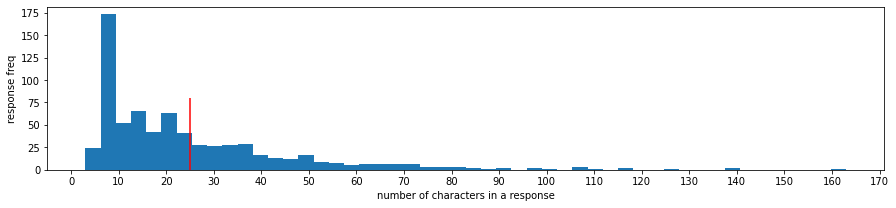

In [11]:
plt.figure(figsize=(15,3))
plt.hist(resp_len,bins=50)
plt.xticks(np.arange(0,300,10))
plt.xlabel('number of characters in a response')
plt.ylabel('response freq')
plt.vlines(resp_len.mean(),0,80, color = 'r')

In [15]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
pd.options.mode.chained_assignment = None  # default='warn'
import nltk
from nltk.corpus import stopwords

stopwords = set(STOPWORDS)
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice', 'moving','moved']
#stopwords.update(["br", "href", "a", "an", "the"] + excluded_words_list)

In [17]:
out_loc = f'../../results/text_analysis/pf/with_cover_story/'

## Word clouds

chargeSpeed 9.0
chargeSpeed 7.75
chargeSpeed 6.5
chargeSpeed 5.25
chargeSpeed 4.0
chargeSpeed 2.75
chargeSpeed 1.5


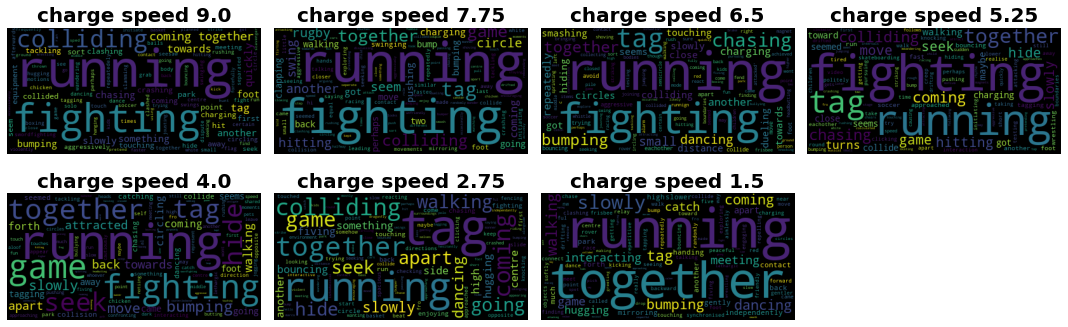

In [32]:
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows = nrows, ncols = ncols,figsize=(15,5))
# plt.suptitle(param_name, fontsize = 40,fontweight='bold')

for i,subt in enumerate(np.unique(df[param_name])[::-1]):
    r = int(np.floor(i/ncols))
    c = i%ncols
    ax = axs[r,c]
    print(param_name, subt)
    rows = df.loc[:,param_name] == subt
    df_subt = df.loc[rows,:]
    
    nchar = np.array([ len(i) for ind,i in enumerate(df_subt['responses']) ])
    txt = ' '.join(df_subt['responses']) # one long string
    txt = txt.lower()
    for words in excluded_words_list:
       txt = txt.replace(words,'')

    wordcloud2 = WordCloud(random_state=1).generate(txt)
    # Generate plot
    ax.imshow(wordcloud2)
    ax.axis("off")
    #ax.set_title('Subtlety ' + str(subt) + '(n=' + str(len(nchar)-too_few_char) + '/ ' + str(len(nchar)) + ')')
    ax.set_title(f'charge speed {subt}',fontsize=20,fontweight='bold')
    ax.set_aspect('equal')
    
axs[1,3].set_visible(False)

plt.tight_layout()
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.1)

plt.savefig(f'{out_loc}wordcloud_withplaying.png')


In [20]:
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice', 'moving','moved', 'playing','play','played']

chargeSpeed 9.0
chargeSpeed 7.75
chargeSpeed 6.5
chargeSpeed 5.25
chargeSpeed 4.0
chargeSpeed 2.75
chargeSpeed 1.5


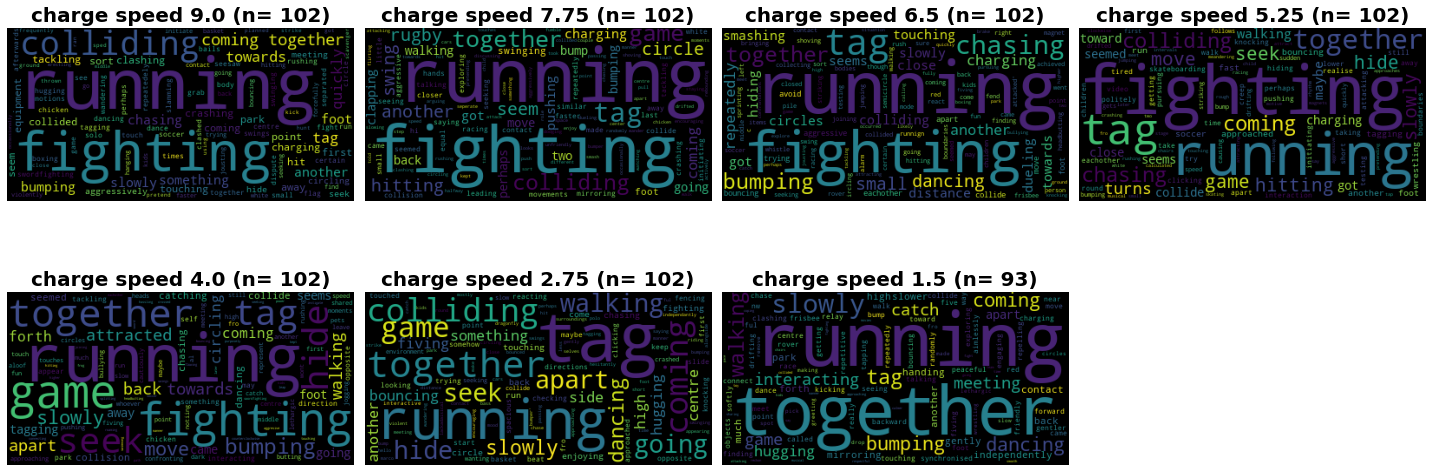

In [21]:
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows = nrows, ncols = ncols,figsize=(20,8))
# plt.suptitle(param_name, fontsize = 40,fontweight='bold')

for i,subt in enumerate(np.unique(df[param_name])[::-1]):
    r = int(np.floor(i/ncols))
    c = i%ncols
    ax = axs[r,c]
    print(param_name, subt)
    rows = df.loc[:,param_name] == subt
    df_subt = df.loc[rows,:]
    
    nchar = np.array([ len(i) for ind,i in enumerate(df_subt['responses']) ])
    txt = ' '.join(df_subt['responses']) # one long string
    txt = txt.lower()
    for words in excluded_words_list:
       txt = txt.replace(words,'')

    wordcloud2 = WordCloud(random_state=1).generate(txt)
    # Generate plot
    ax.imshow(wordcloud2)
    ax.axis("off")
    #ax.set_title('Subtlety ' + str(subt) + '(n=' + str(len(nchar)-too_few_char) + '/ ' + str(len(nchar)) + ')')
    ax.set_title(f'charge speed {subt} (n= {len(nchar)})',fontsize=20,fontweight='bold')
    ax.set_aspect('equal')
    
axs[1,3].set_visible(False)

plt.tight_layout()
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.1)

plt.savefig(f'{out_loc}wordcloud.png')


In [22]:
color_plots = 'tab:red' # or tab:red

In [23]:
s=12 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [24]:
ref_words = ['play','fight','wander','move','independent']
words = df['responses']
df['play_bool'] = [1 if ('play' in i)|('playing' in i) else 0 for i in words ]
df['fight_bool'] =  [1 if ('fight' in i) |('fighting'   in i) else 0 for i in words ]
df['wander_bool'] = [1 if ('wander' in i)|('hitting' in i) else 0 for i in words ]
df['move_bool'] = [1 if ('move' in i)|('moving' in i) else 0 for i in words ]
df['independent_bool'] = [1 if ('independent' in i)|('independently' in i) else 0 for i in words ]

In [25]:
inds = [[0,0],[0,1],[1,0],[1,1],[1,2]]
words_pos_dict = dict(zip(ref_words,inds))
words_pos_dict

{'play': [0, 0],
 'fight': [0, 1],
 'wander': [1, 0],
 'move': [1, 1],
 'independent': [1, 2]}

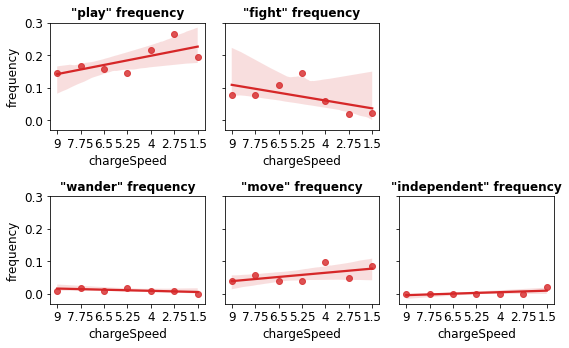

In [27]:
nrows,ncols = 2,3
fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (8,5), sharey = True)

for i,word in enumerate(ref_words):
    r,c = words_pos_dict[word]
    ax = axs[r,c]
    sns.regplot(data=df.groupby([param_name]).mean().reset_index(),x = param_name,y = word + '_bool',\
        ax=ax,marker = 'o', color = color_plots)
    ax.set_xticks(np.unique(df[param_name]))
    ax.set_title(f'"{word}" frequency', fontweight = 'bold')
    if c ==0:
        ax.set_ylabel('frequency')
    else:
        ax.set_ylabel('')
    ax.set_yticks([0,0.1, 0.2,0.3])
    ax.set_xticks(np.arange(1.5,9.1,1.25),['1.5','2.75','4','5.25','6.5','7.75','9'])
    ax.invert_xaxis()

axs[0,2].axis('off')

plt.tight_layout()
plt.savefig(f'{out_loc}word_frequency.png',dpi=300,bbox_inches ='tight')

In [26]:
from pymer4.models import Lmer
from pymer4.stats import vif
from scipy.stats import zscore

In [27]:
df[param_name] = zscore(df[param_name])

In [28]:
ref_words

['play', 'fight', 'wander', 'move', 'independent']

In [29]:
word = ref_words[0]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)+ (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: play_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: -306.804 	 AIC: 621.608

Random effects:

              Name    Var   Std
movie  (Intercept)  0.000  0.00
subID  (Intercept)  2.046  1.43

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.057,-2.491,-1.623,0.221,0.128,0.083,0.197,0.113,0.077,0.165,-9.296,0.00,***
chargeSpeed,-0.243,-0.462,-0.024,0.112,0.784,0.630,0.976,0.440,0.386,0.494,-2.173,0.03,*


In [30]:
np.unique(df['chargeSpeed'].values)

array([-1.53170223, -1.02757054, -0.52343886, -0.01930717,  0.48482452,
        0.9889562 ,  1.49308789])

In [31]:
word = ref_words[1]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)+ (1|movie)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

[1] "Model failed to converge with max|grad| = 0.0742455 (tol = 0.002, component 1)"
[2] " \n"                                                                           

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

Formula: fight_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: -172.339 	 AIC: 352.678

Random effects:

              Name    Var    Std
movie  (Intercept)  0.809  0.899
subID  (Intercept)  1.945  1.395

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-3.623,-3.625,-3.621,0.001,0.027,0.027,0.027,0.026,0.026,0.026,-3804.081,0.0,***
chargeSpeed,0.447,0.445,0.448,0.001,1.563,1.560,1.566,0.610,0.609,0.610,468.917,0.0,***


In [32]:
word = ref_words[1]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: fight_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: -173.672 	 AIC: 353.344

Random effects:

              Name    Var    Std
subID  (Intercept)  1.794  1.339

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-3.284,-3.921,-2.648,0.325,0.037,0.020,0.071,0.036,0.019,0.066,-10.113,0.000,***
chargeSpeed,0.399,0.085,0.714,0.160,1.491,1.089,2.041,0.599,0.521,0.671,2.490,0.013,*


In [33]:
word = ref_words[2]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID) + (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: wander_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: -39.240 	 AIC: 86.481

Random effects:

              Name     Var    Std
movie  (Intercept)   0.000  0.000
subID  (Intercept)  30.836  5.553

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-8.896,-12.404,-5.387,1.790,0.000,0.000,0.005,0.000,0.0,0.005,-4.969,0.00,***
chargeSpeed,0.403,-0.407,1.214,0.414,1.497,0.665,3.366,0.599,0.4,0.771,0.975,0.33,


In [34]:
word = ref_words[2]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: wander_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: -39.240 	 AIC: 84.481

Random effects:

              Name     Var    Std
subID  (Intercept)  30.837  5.553

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-8.896,-12.404,-5.387,1.790,0.000,0.000,0.005,0.000,0.0,0.005,-4.969,0.00,***
chargeSpeed,0.403,-0.407,1.214,0.414,1.497,0.665,3.366,0.599,0.4,0.771,0.975,0.33,


In [35]:
word = ref_words[3]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)+ (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: move_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: -89.159 	 AIC: 186.319

Random effects:

              Name       Var     Std
movie  (Intercept)  1158.621  34.039
subID  (Intercept)  1345.033  36.675

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-38.442,-52.755,-24.129,7.303,0.000,0.0,0.000,0.00,0.0,0.0,-5.264,0.000,***
chargeSpeed,-2.584,-13.706,8.538,5.675,0.075,0.0,5104.965,0.07,0.0,1.0,-0.455,0.649,


In [36]:
word = ref_words[3]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: move_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: -110.132 	 AIC: 226.264

Random effects:

              Name     Var    Std
subID  (Intercept)  33.548  5.792

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-7.756,-10.089,-5.423,1.190,0.000,0.000,0.004,0.000,0.000,0.004,-6.516,0.00,***
chargeSpeed,-0.442,-0.902,0.018,0.235,0.643,0.406,1.018,0.391,0.289,0.505,-1.882,0.06,.


In [37]:
word = ref_words[4]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID) + (1|movie)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: independent_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: -3.221 	 AIC: 14.443

Random effects:

              Name       Var     Std
movie  (Intercept)     0.000   0.000
subID  (Intercept)  3913.117  62.555

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-79.455,-102.917,-55.993,11.971,0.0,0.0,0.0,0.0,0.0,0.0,-6.638,0.0,***
chargeSpeed,-42.089,-56.780,-27.397,7.496,0.0,0.0,0.0,0.0,0.0,0.0,-5.615,0.0,***


In [38]:
word = ref_words[4]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: independent_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: -3.222 	 AIC: 12.443

Random effects:

              Name       Var     Std
subID  (Intercept)  4133.642  64.293

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-542.697,-1232.670,147.275,352.033,0.0,0.0,9.132567e+63,0.0,0.0,1.0,-1.542,0.123,
chargeSpeed,-344.464,-795.059,106.131,229.900,0.0,0.0,1.236182e+46,0.0,0.0,1.0,-1.498,0.134,
